In [1]:
## note these to add w/Poetry to the Dockerfile
%pip install pandas
%pip install networkx
%pip install scipy

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from copy import deepcopy
from scipy.spatial.distance import pdist
from tensorflow.keras.layers import Dense, Multiply, Add
from tensorflow.keras import Model
from tensorflow.keras.constraints import NonNeg 
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [3]:
url = 'http://cs.bc.edu/~prudhome/AAPLD/animal-similarity.csv'

raw_dataset = pd.read_csv(url, index_col=0)
list_of_animal_pairs = raw_dataset.index.str.split('~')

In [4]:
animal_pair_data = pd.DataFrame.from_records(list_of_animal_pairs, columns=['first_animal', 'second_animal'], index= raw_dataset.index)

In [5]:
animal_pair_data.sort_values(by = ['first_animal', 'second_animal'], inplace=True)

In [6]:
unique_animals = set(animal_pair_data.first_animal).union(animal_pair_data.second_animal)

In [7]:
animal_pairs = nx.Graph()
animal_pairs.add_nodes_from(unique_animals)
animal_pairs.add_edges_from(list_of_animal_pairs)

In [8]:
low_degree=[k for k,v in animal_pairs.degree._nodes.items() if len(v) < 32]

In [9]:
animal_pairs.remove_nodes_from(low_degree)

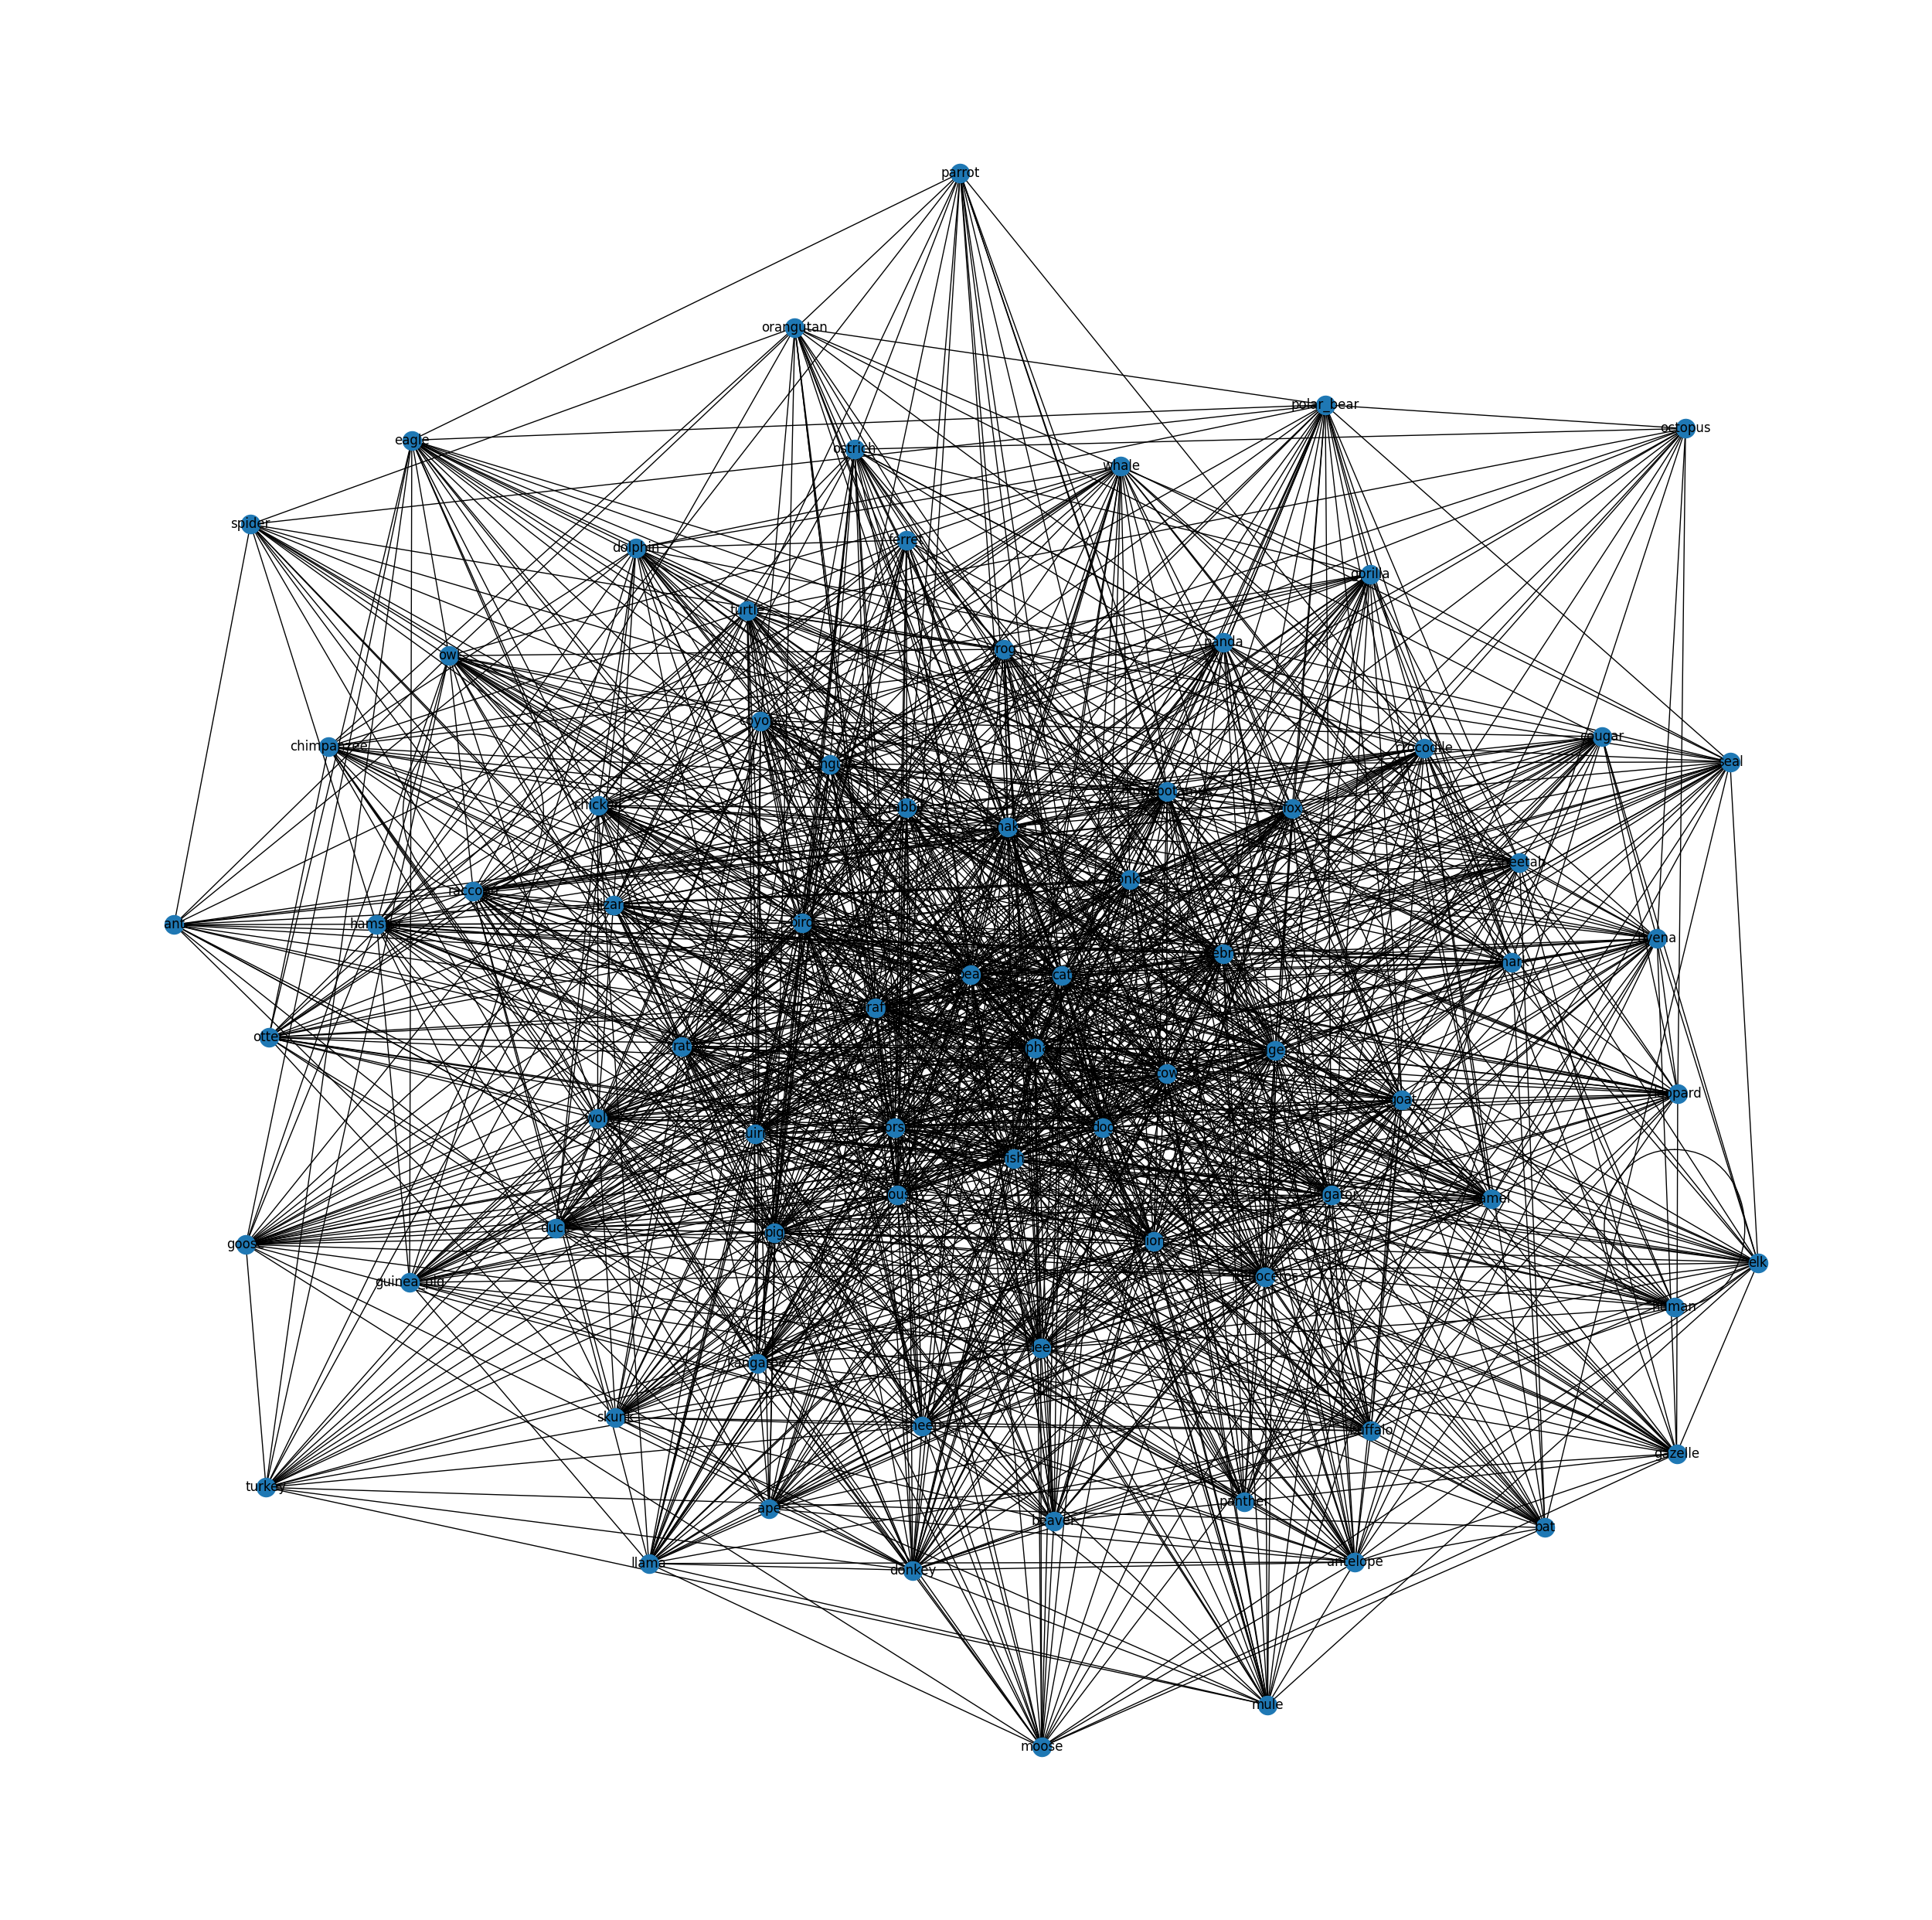

In [10]:
fig, ax = plt.subplots(figsize=(32,32))
nx.draw(animal_pairs, with_labels=True, ax=ax)

plt.show()

In [11]:
connected_list = [x for x in animal_pairs.nodes]

In [12]:
# try the small list, or, failing that, just the apes

In [13]:
smaller_animal_pair_data=animal_pair_data.loc[animal_pair_data['first_animal' ].isin( connected_list) & animal_pair_data['second_animal' ].isin( connected_list) ] 

In [14]:
joined_data=smaller_animal_pair_data.join(raw_dataset).drop(columns='[All_Ratings]')

In [15]:
big_matrix = pd.DataFrame(index=connected_list, columns = connected_list)

In [16]:
joined_data

first_animal second_animal  Average_Rating
Pair                                                         
alligator~antelope    alligator      antelope           1.940
alligator~bird        alligator          bird           2.080
alligator~buffalo     alligator       buffalo           1.080
alligator~elephant    alligator      elephant           1.140
alligator~fish        alligator          fish           1.000
...                         ...           ...             ...
zebra~seal                zebra          seal           1.040
zebra~shark               zebra         shark           1.067
zebra~snake               zebra         snake           1.880
zebra~tiger               zebra         tiger           2.720
zebra~turtle              zebra        turtle           1.120

[1601 rows x 3 columns]

In [17]:
#TODO wrap below section into functions

In [18]:
for row in joined_data.iterrows():
    big_matrix.loc[row[1].first_animal][row[1].second_animal] = row[1].Average_Rating
    big_matrix.loc[row[1].second_animal][row[1].first_animal] = row[1].Average_Rating

In [19]:
big_matrix = big_matrix.astype(float)

In [20]:
# big_matrix = big_matrix[big_matrix.isna().mean(1) < 0.5]
# big_matrix = big_matrix[big_matrix.index.to_list()]

In [21]:
big_matrix = big_matrix[big_matrix.isna().mean(1) < 0.33]

In [22]:
big_matrix = big_matrix[big_matrix.index.to_list()]

In [23]:
plt.matshow(big_matrix)

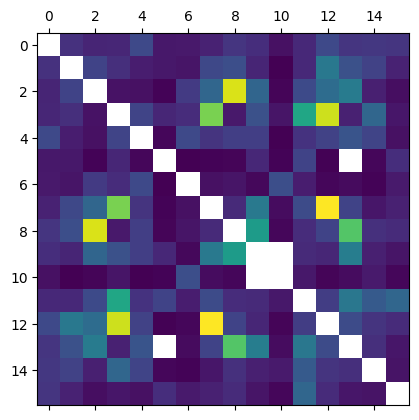

In [24]:
plt.show()

In [25]:
big_matrix.isna().mean(1)

elephant    0.0625
giraffe     0.0625
zebra       0.0625
cat         0.0625
bear        0.0625
bird        0.1250
snake       0.0625
tiger       0.0625
horse       0.0625
cow         0.1250
fish        0.1250
dog         0.0625
lion        0.0625
deer        0.1250
pig         0.0625
monkey      0.0625
dtype: float64

In [26]:
big_matrix.shape

(16, 16)

In [27]:
big_matrix

elephant  giraffe  zebra    cat   bear  bird  snake  tiger  horse  \
elephant       NaN    1.740  1.550  1.560  2.160  1.34   1.36  1.500  1.800   
giraffe      1.740      NaN  2.040  1.700  1.425  1.34   1.30  2.125  2.250   
zebra        1.550    2.040    NaN  1.260  1.240  1.06   1.88  2.720  5.917   
cat          1.560    1.700  1.260    NaN  2.080  1.56   1.66  5.160  1.360   
bear         2.160    1.425  1.240  2.080    NaN  1.10   2.16  1.780  1.960   
bird         1.340    1.340  1.060  1.560  1.100   NaN   1.00  1.060  1.080   
snake        1.360    1.300  1.880  1.660  2.160  1.00    NaN  1.240  1.300   
tiger        1.500    2.125  2.720  5.160  1.780  1.06   1.24    NaN  1.620   
horse        1.800    2.250  5.917  1.360  1.960  1.08   1.30  1.620    NaN   
cow          1.683    1.540  2.700  2.300  1.960  1.58   1.11  3.117  3.860   
fish         1.240    1.020  1.080  1.300  1.000  1.06   2.26  1.180  1.100   
dog          1.600    1.600  2.175  4.080  1.760  2.05   1.42  2.200  1.660   
lion         2.160    3.100  2.840  5.820  2.020  1.04   1.10  6.220  2.040   
deer         1.800    2.300  3.180  1.480  2.360   NaN   1.16  2.040  4.820   
pig          1.840    2.020  1.460  2.717  2.080  1.10   1.06  1.320  1.720   
monkey       1.810    1.500  1.200  1.320  1.240  1.68   1.38  1.480  1.640   

            cow   fish    dog   lion  deer    pig  monkey  
elephant  1.683  1.240  1.600  2.160  1.80  1.840    1.81  
giraffe   1.540  1.020  1.600  3.100  2.30  2.020    1.50  
zebra     2.700  1.080  2.175  2.840  3.18  1.460    1.20  
cat       2.300  1.300  4.080  5.820  1.48  2.717    1.32  
bear      1.960  1.000  1.760  2.020  2.36  2.080    1.24  
bird      1.580  1.060  2.050  1.040   NaN  1.100    1.68  
snake     1.110  2.260  1.420  1.100  1.16  1.060    1.38  
tiger     3.117  1.180  2.200  6.220  2.04  1.320    1.48  
horse     3.860  1.100  1.660  2.040  4.82  1.720    1.64  
cow         NaN    NaN  1.620  1.560  3.22  1.460    1.29  
fish        NaN    NaN  1.340  1.067  1.18  1.370    1.10  
dog       1.620  1.340    NaN  1.940  3.06  2.480    2.72  
lion      1.560  1.067  1.940    NaN  2.20  1.780    1.64  
deer      3.220  1.180  3.060  2.200   NaN  1.700    1.32  
pig       1.460  1.370  2.480  1.780  1.70    NaN    1.28  
monkey    1.290  1.100  2.720  1.640  1.32  1.280     NaN

In [28]:
# todo make into function
similarities = big_matrix.to_numpy()
similarity_vec = np.tril(similarities, -1)
similarity_vec = similarity_vec[np.nonzero(similarity_vec)]

In [29]:
# FIll in NA's 

In [30]:
similarity_vec = np.nan_to_num(similarity_vec, nan=min(similarity_vec))

In [31]:
dissimilarity_vec = np.exp(-1*similarity_vec)

In [32]:
len(dissimilarity_vec) 
# :=Y  = n(n-1)/2
# 2Y = n^2 - n
# 0 = n^2 - n - 2Y

# 0 = (n - 1/2) ^2 - 1/4 - 2Y 
# 2Y + 1/4 = (n - 1/2)^2
# N = 1/2 + sqrt(2Y + 1/4)


120

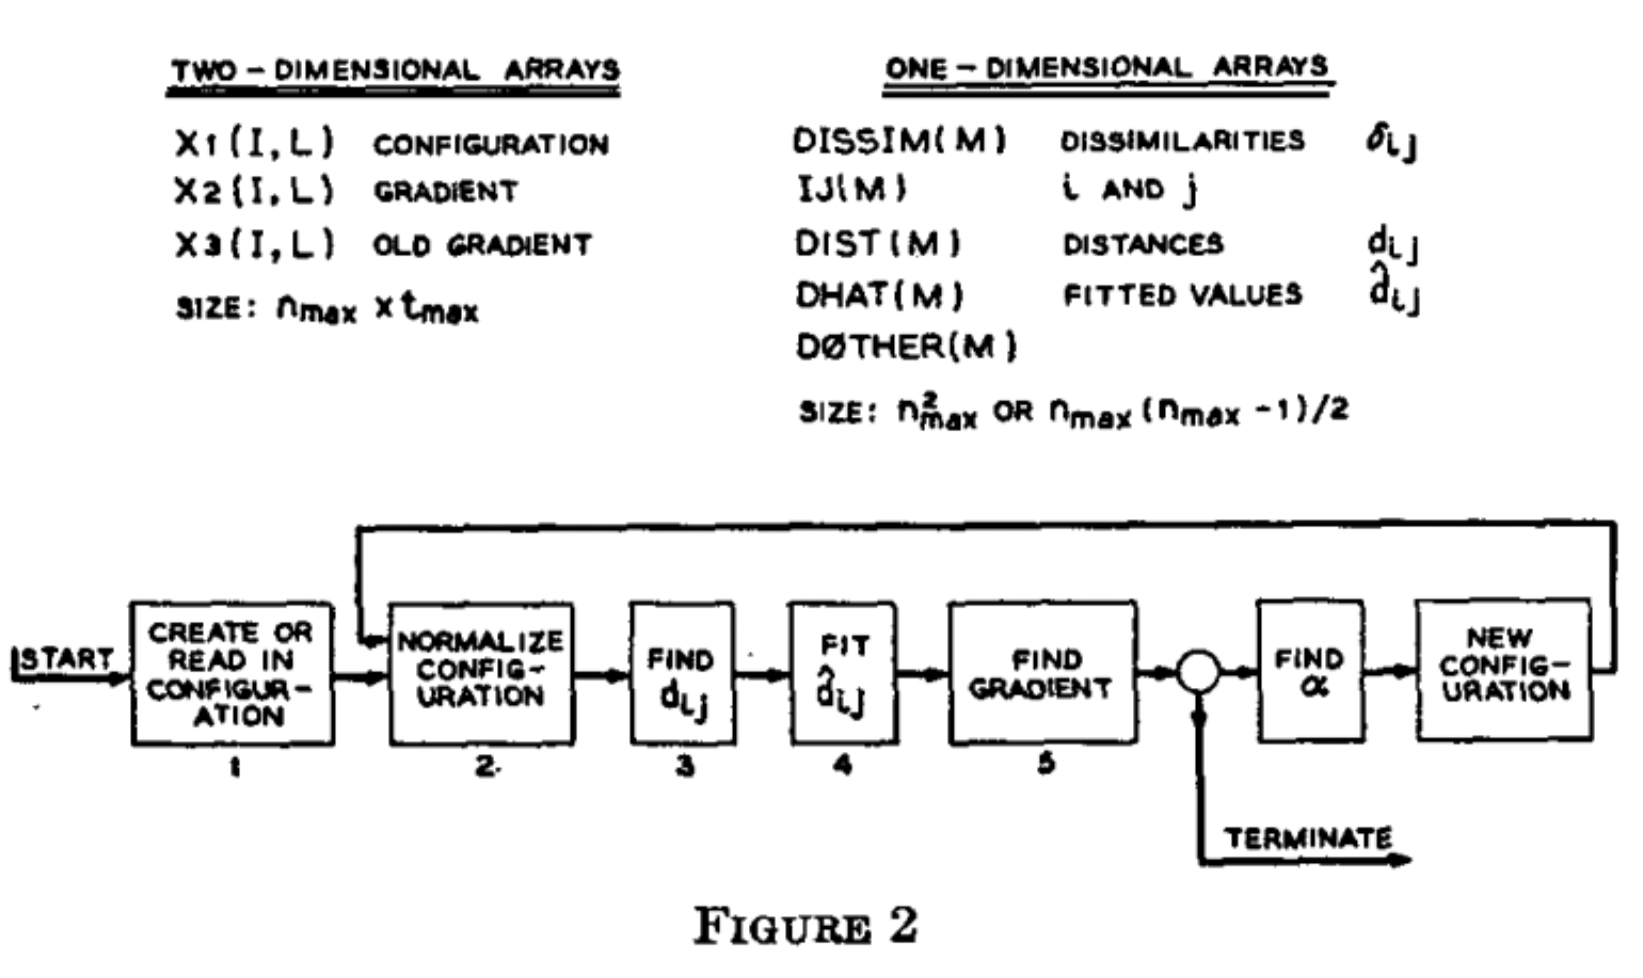
From Kruskal, 1964

Idea is to follow these steps, 

In [33]:
def generate_starting_configuration(dis_vec, n_points, dim=2):
    ## Generate kruskal_style t-dimensional starting configuration
    #  N = 1/2 + sqrt(2Y + 1/4)

    assert n_points == int(1/2 + np.sqrt(2*len(dis_vec) +1/4))
    
    max_multiplier = n_points//dim + 2
    #say 503 points in2 dim, then we need 252 diags, drop the last row of the last one , s0 have to go from 
    # 1 to n_points/dim +2
    starting_config = np.vstack([np.diag(j*np.ones(dim)) for j in range(1,max_multiplier)])
    return starting_config[:n_points,:]


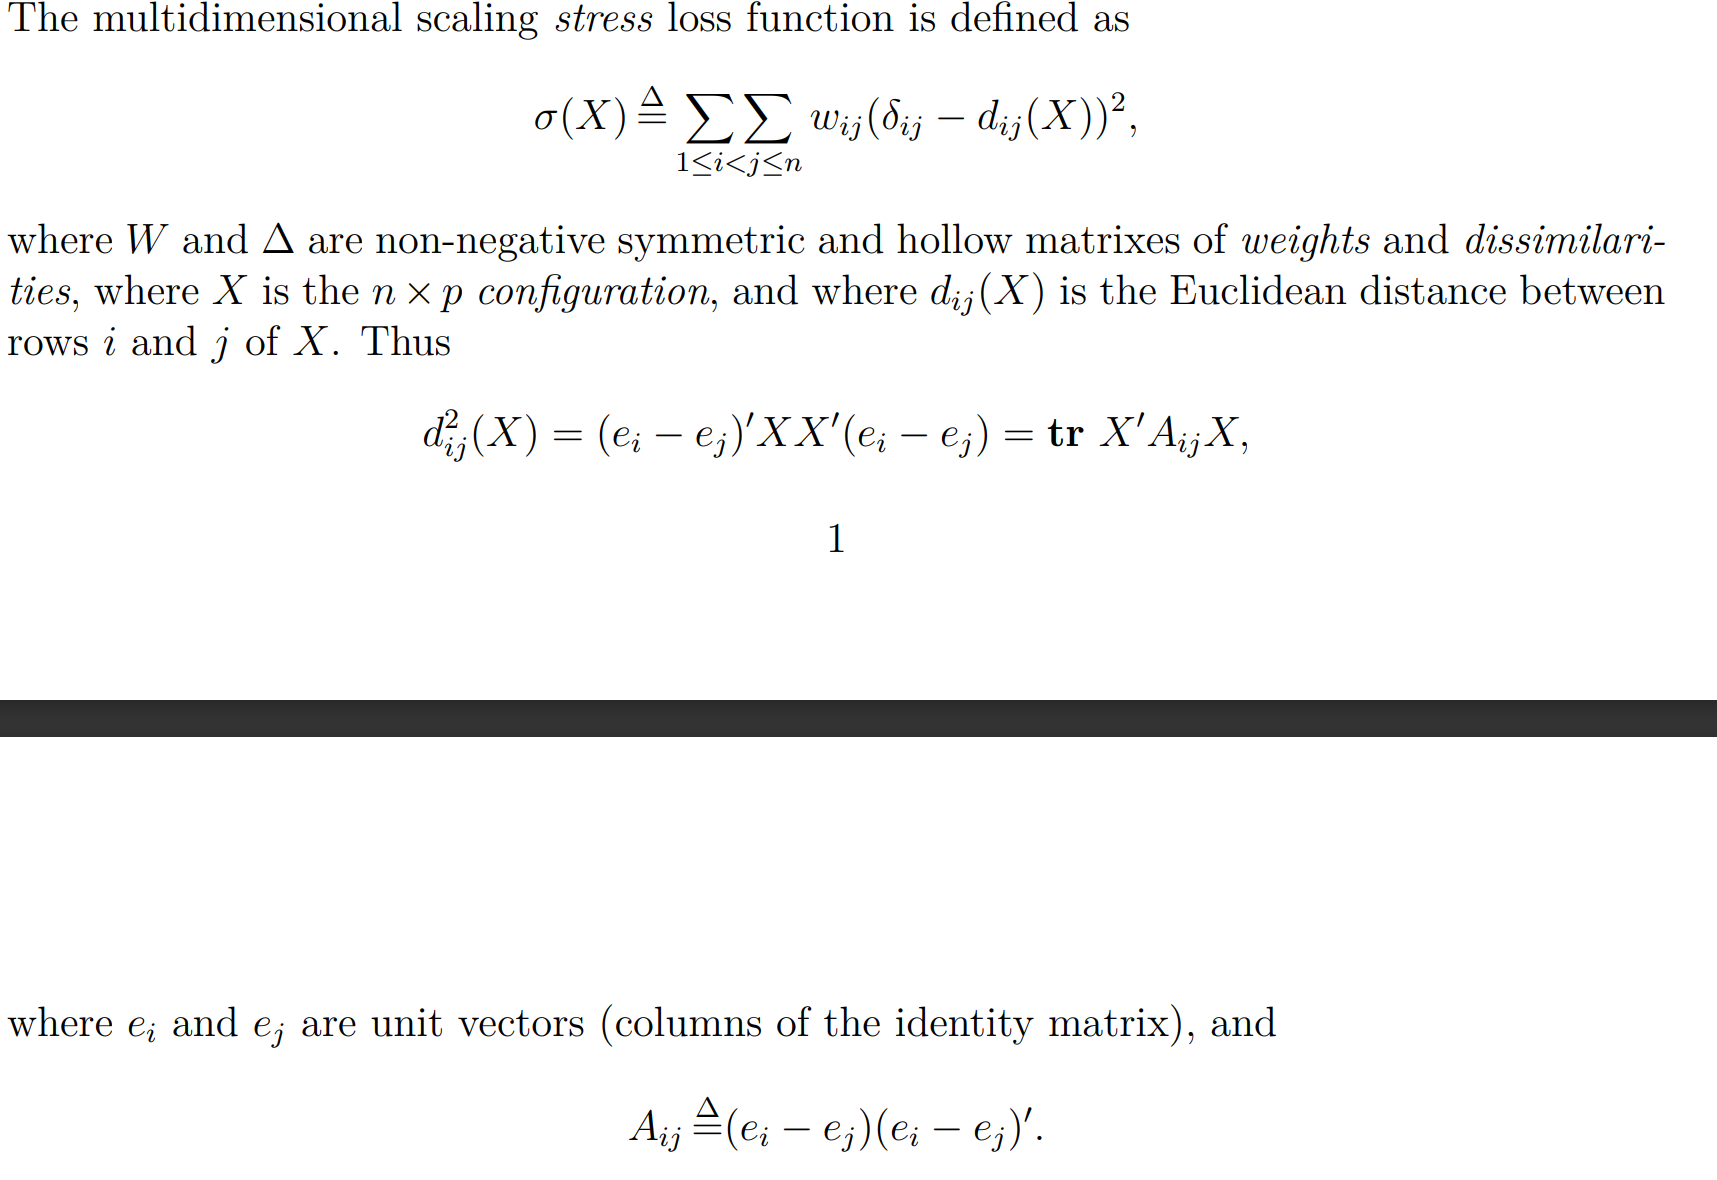
From https://jansweb.netlify.app/publication/deleeuw-e-18-c/
NB: $\delta_{ij}$ here is the true dissimilarity between $i$ and $j$ 

In [34]:
## TODO move to matrix_utils.py 
## MAYBE rewrite in pure tensorflow
### need config_dim 
### -> then apply np.outer on each to get Aij
##
def self_outer(basis_vector:tf.Tensor)->tf.Tensor:
    return tf.einsum('i,j->ij', basis_vector, basis_vector)
    

def all_pairwise_basis_diffs(max_index:int)->tf.Tensor:
  
    assert max_index > 1 ## ignore first basis vector  
    eye_ref = tf.eye(num_rows=max_index, num_columns=max_index, dtype=tf.float64)
    
    ## tensor with shape given by all pairs 
    output = tf.TensorArray(dtype=tf.float64, size=(max_index**2 - max_index)//2)
    idx = 0
    for upper_index in range(2, max_index):
        for lower_index in range(upper_index):
            diff = eye_ref[:,lower_index] - eye_ref[:,upper_index]
            output = output.write(idx, self_outer(diff))
            idx += 1
#                      np.apply_along_axis(func1d=self_outer, axis=0, arr=ei_minus_ejs)
    return output 
                     
### then apply func1d on Aijs 
def pairwise_dist_block_chunk(outer_distance:np.array, configuration:np.array):
    # Compute tr X'A_ij X 
    outer_distance = tf.cast(outer_distance, tf.float64)
    configuration = tf.cast(configuration, tf.float64)
    return tf.linalg.trace(tf.einsum('ij,jk->ik',tf.einsum('ij,jk->ik', tf.transpose(configuration), outer_distance),configuration))
    
@tf.function
def get_pairwise_distances(configuration:tf.Variable)->tf.Variable:
    number_obs = configuration.shape[0]
    number_dists = (number_obs**2 - number_obs)//2
    ## tensorarray with shape given by all pairs; this one is to hold the individual differences
    output = tf.TensorArray(dtype=tf.float64, size=number_dists)
    
    outerL = all_pairwise_basis_diffs(number_obs)
    
 
    ## loop over outerL and apply pairwise_dist_block_chunck
    for j in range(number_dists):
        output = output.write(j, pairwise_dist_block_chunk(outerL.read(j), configuration))
    return output.stack()



In [35]:
## todo move to pdistlayer.py
## convert to tensorflow
def tf_get_pw_dist(tensorconfig:tf.Tensor)->tf.Tensor:
    dhat = tf.expand_dims(tf.py_function(func = get_pairwise_distances, inp = [tensorconfig], Tout=tf.float64, name="pairwise_dist"),-1)
    return dhat

In [36]:
jh = tf.eye(3)
for x in range(1,3):
    for j in range(x):
        print(f"{x,j}")
        print(jh[x,j])
    pass

(1, 0)
tf.Tensor(0.0, shape=(), dtype=float32)
(2, 0)
tf.Tensor(0.0, shape=(), dtype=float32)
(2, 1)
tf.Tensor(0.0, shape=(), dtype=float32)


In [37]:
jh

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)>

In [38]:
## wrap pairwise distance in a layer
class PDistLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(PDistLayer, self).__init__()
        
    def call(self, inputs):
        return tf.expand_dims(get_pairwise_distances(inputs),0)

In [39]:
#todo move to mdsmodel.py
class MDSModel(Model):
    def __init__(self,configuration):
        super(MDSModel, self).__init__()
        self.config = tf.Variable(configuration, dtype=tf.float64, trainable=True, name ='initial_config')
        self.new_config = tf.Variable(tf.ones_like(self.config), trainable=True, name = 'derived_config')
        self.number_obs = self.config.shape[0]
        self.number_dists = (self.number_obs**2 - self.number_obs)//2
        self.distance = PDistLayer()
        self.d1 = Dense(128, activation='relu', kernel_constraint=NonNeg())
        self.d2 = Dense(self.number_dists, activation='relu', kernel_constraint=NonNeg())

    def call(self, x):
        #nb we are throwing away x here 
        x = Multiply()([self.new_config, self.config])
        x = self.distance(x)
        x = self.d1(x)
        x = self.d2(x)
        return x

# Create an instance of the model


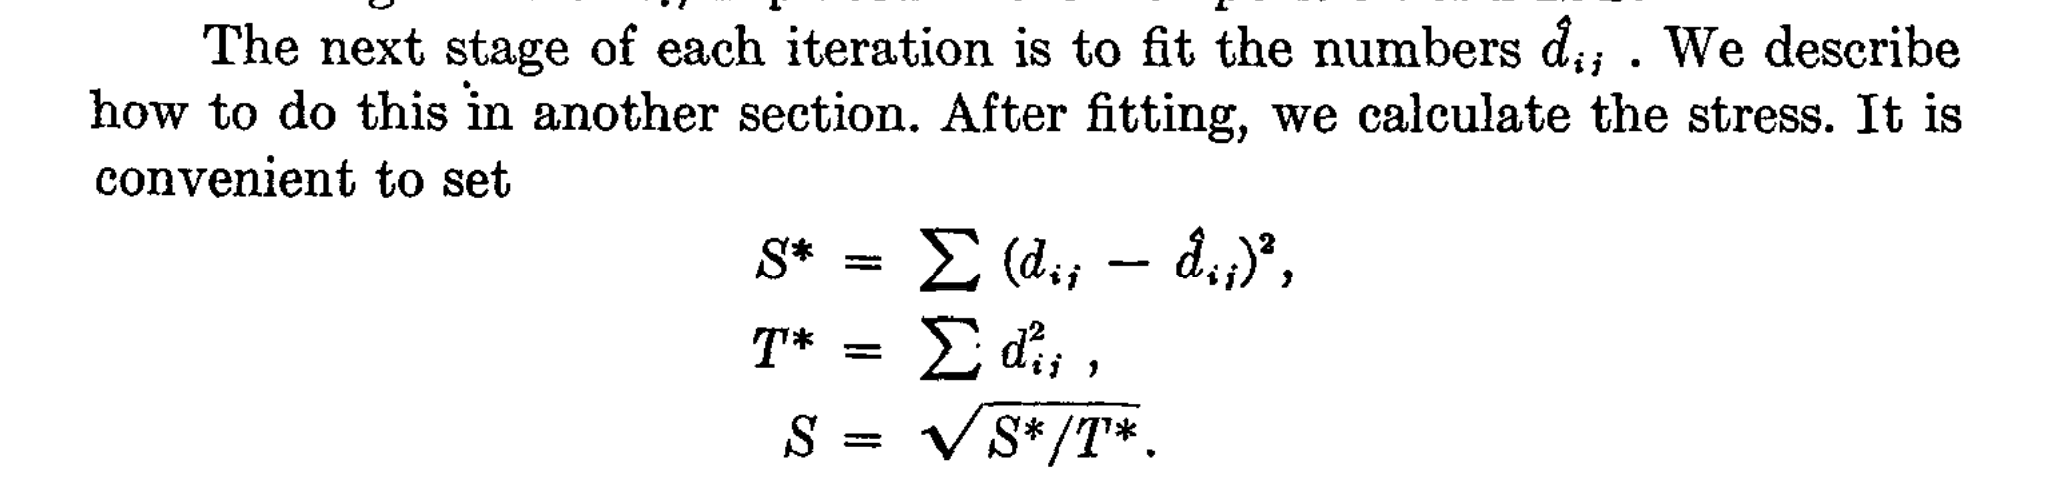
Stress Loss function from Kruskal, 1964

In [40]:
@tf.function
def stress(y_true, y_pred):
    Sstar = tf.math.reduce_sum(tf.math.square(y_true - y_pred),axis=-1)
    Tstar = tf.math.reduce_sum(tf.square(y_true),axis=-1)
    S = tf.math.sqrt(tf.math.divide_no_nan(Sstar,Tstar))
    return S  # Note the `axis=-1`



In [41]:
stress(tf.constant((1,3,3.)), tf.constant((6.,4,2)))

<tf.Tensor: shape=(), dtype=float32, numpy=1.1920791>

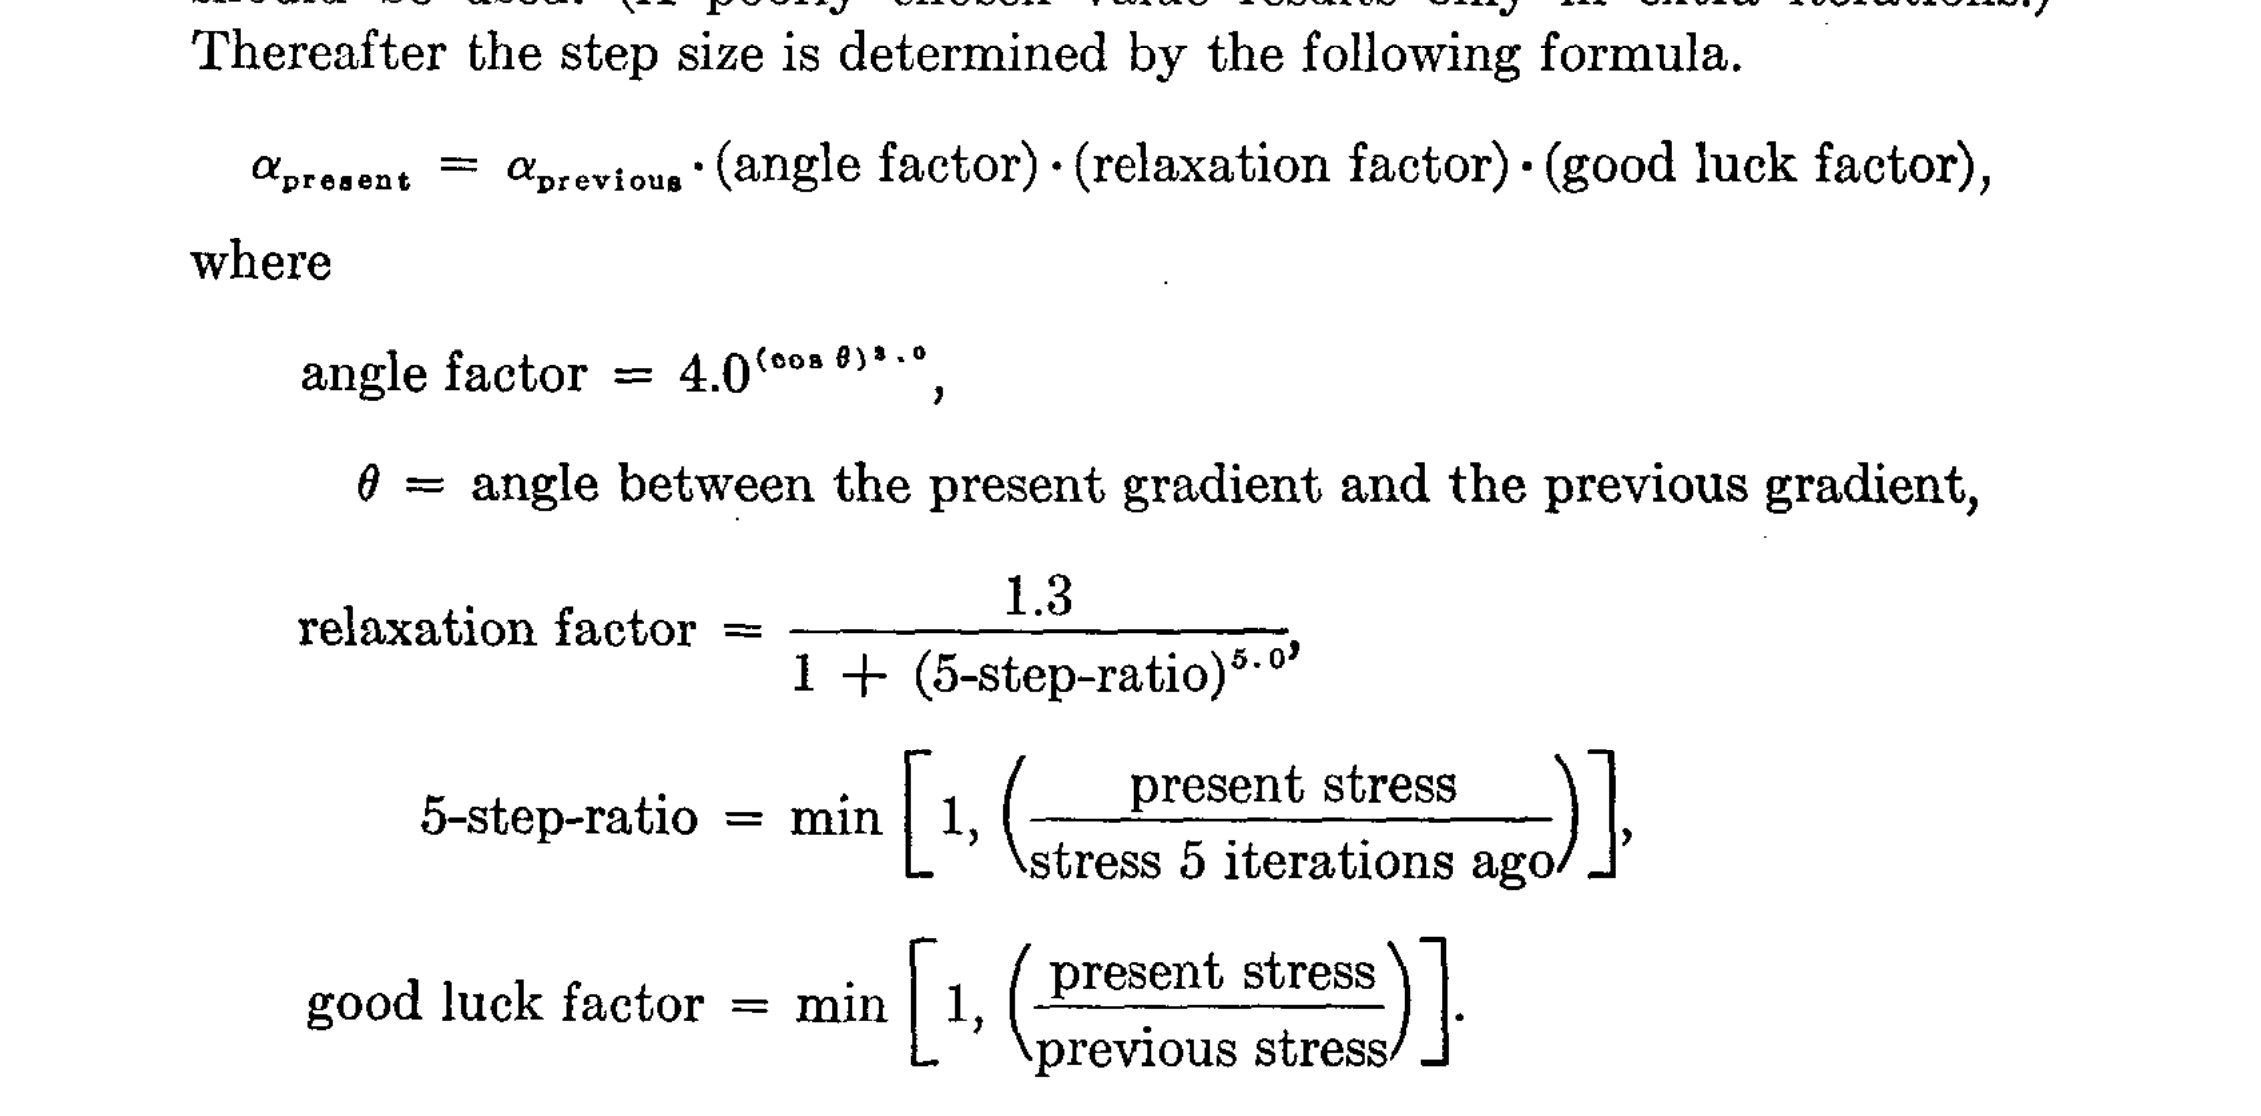
Optimizer from Kruskal, 1964

In [42]:
# todo make doctest for relevant fxs
index = 5
max_rows = 19
fake_dist_vec = np.ones(((max_rows**2 - max_rows)//2, 1))
eye_ref = np.eye(N=max_rows, M = index)
ei_minus_ejs =  eye_ref[:,:-1] - eye_ref[:,-1].reshape(max_rows,1)


In [43]:
test_outer = np.outer(ei_minus_ejs[:,3],ei_minus_ejs[:,3])
test_config = generate_starting_configuration(fake_dist_vec, max_rows)
outer_list = np.apply_along_axis(func1d=self_outer, axis=0, arr=ei_minus_ejs)

In [44]:
pairwise_dist_over_chunks = [pairwise_dist_block_chunk(outer_list[:,:,k], test_config) for k in range(outer_list.shape[2]) ]


In [45]:
pairwise_dist_over_chunks

[<tf.Tensor: shape=(), dtype=float64, numpy=4.0>,
 <tf.Tensor: shape=(), dtype=float64, numpy=10.0>,
 <tf.Tensor: shape=(), dtype=float64, numpy=1.0>,
 <tf.Tensor: shape=(), dtype=float64, numpy=13.0>]

In [46]:
# pairwise_dists_of_block(4, test_config)

In [47]:
np.array_equal(outer_list[:,:,3], np.outer(ei_minus_ejs[:,3],ei_minus_ejs[:,3]))

True

In [48]:
# pwsd = get_pairwise_distances(test_config)

In [49]:
len(fake_dist_vec)

171

In [50]:
tf_config = tf.convert_to_tensor(test_config)
get_pairwise_distances(tf_config)

<tf.Tensor: shape=(171,), dtype=float64, numpy=
array([  1.,   5.,   5.,   1.,   8.,   4.,  10.,   1.,  13.,  10.,   4.,
        13.,   1.,  18.,   9.,  17.,   4.,  20.,   1.,  25.,  17.,   9.,
        20.,   4.,  25.,   1.,  32.,  16.,  26.,   9.,  29.,   4.,  34.,
         1.,  41.,  26.,  16.,  29.,   9.,  34.,   4.,  41.,   1.,  50.,
        25.,  37.,  16.,  40.,   9.,  45.,   4.,  52.,   1.,  61.,  37.,
        25.,  40.,  16.,  45.,   9.,  52.,   4.,  61.,   1.,  72.,  36.,
        50.,  25.,  53.,  16.,  58.,   9.,  65.,   4.,  74.,   1.,  85.,
        50.,  36.,  53.,  25.,  58.,  16.,  65.,   9.,  74.,   4.,  85.,
         1.,  98.,  49.,  65.,  36.,  68.,  25.,  73.,  16.,  80.,   9.,
        89.,   4., 100.,   1., 113.,  65.,  49.,  68.,  36.,  73.,  25.,
        80.,  16.,  89.,   9., 100.,   4., 113.,   1., 128.,  64.,  82.,
        49.,  85.,  36.,  90.,  25.,  97.,  16., 106.,   9., 117.,   4.,
       130.,   1., 145.,  82.,  64.,  85.,  49.,  90.,  36.,  97.,  25.,
   

In [51]:
tf.expand_dims(get_pairwise_distances(tf_config),1)

<tf.Tensor: shape=(171, 1), dtype=float64, numpy=
array([[  1.],
       [  5.],
       [  5.],
       [  1.],
       [  8.],
       [  4.],
       [ 10.],
       [  1.],
       [ 13.],
       [ 10.],
       [  4.],
       [ 13.],
       [  1.],
       [ 18.],
       [  9.],
       [ 17.],
       [  4.],
       [ 20.],
       [  1.],
       [ 25.],
       [ 17.],
       [  9.],
       [ 20.],
       [  4.],
       [ 25.],
       [  1.],
       [ 32.],
       [ 16.],
       [ 26.],
       [  9.],
       [ 29.],
       [  4.],
       [ 34.],
       [  1.],
       [ 41.],
       [ 26.],
       [ 16.],
       [ 29.],
       [  9.],
       [ 34.],
       [  4.],
       [ 41.],
       [  1.],
       [ 50.],
       [ 25.],
       [ 37.],
       [ 16.],
       [ 40.],
       [  9.],
       [ 45.],
       [  4.],
       [ 52.],
       [  1.],
       [ 61.],
       [ 37.],
       [ 25.],
       [ 40.],
       [ 16.],
       [ 45.],
       [  9.],
       [ 52.],
       [  4.],
       [ 61.],
     

In [52]:
## Steps 
### Define configuration 
#### for each training iteration
#### normalize 
#### find pairwise distances
#### monotone regression
#### gradient descent



In [53]:
start_config = generate_starting_configuration(dissimilarity_vec, len(big_matrix.index))
start_tf_config = tf.convert_to_tensor(start_config)

In [54]:
disty = PDistLayer()

In [55]:
with tf.GradientTape() as tape:
    out = disty(start_tf_config)
gradients = tape.gradient(out,tf_config)


In [56]:
gradients

In [57]:
Multiply()([tf.ones_like(tf_config), tf_config])


<tf.Tensor: shape=(19, 2), dtype=float32, numpy=
array([[ 1.,  0.],
       [ 0.,  1.],
       [ 2.,  0.],
       [ 0.,  2.],
       [ 3.,  0.],
       [ 0.,  3.],
       [ 4.,  0.],
       [ 0.,  4.],
       [ 5.,  0.],
       [ 0.,  5.],
       [ 6.,  0.],
       [ 0.,  6.],
       [ 7.,  0.],
       [ 0.,  7.],
       [ 8.,  0.],
       [ 0.,  8.],
       [ 9.,  0.],
       [ 0.,  9.],
       [10.,  0.]], dtype=float32)>

In [58]:
# plt.scatter(dhat, dissimilarity_vec)
# plt.show()

In [59]:
# configuration.shape

In [60]:
# np.mean(configuration,0)

In [61]:
# configuration

In [62]:
## Training loop
N_EPOCHS = 20


In [63]:
# The monotone regression: wrap in function
configuration = deepcopy(start_config)
model = MDSModel(configuration)
model.compile(optimizer='adam', loss=stress)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
loss_object = stress

In [64]:
train_loss = tf.keras.metrics.Mean(name='train_loss')

In [65]:
@tf.function
def train_step(config, dis_vec):
    with tf.GradientTape(persistent=False) as tape:
#         tape.watch(config)
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
        predictions = model(config, training=True)
        print("made predictions")
        loss = loss_object(dis_vec, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    print(gradients)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    return predictions 

In [66]:
train_step(start_tf_config, dissimilarity_vec)

made predictions
[<tf.Tensor 'gradient_tape/mds_model/dense/MatMul/MatMul_1:0' shape=(120, 128) dtype=float32>, <tf.Tensor 'gradient_tape/mds_model/dense/BiasAdd/BiasAddGrad:0' shape=(128,) dtype=float32>, <tf.Tensor 'gradient_tape/mds_model/dense_1/MatMul/MatMul_1:0' shape=(128, 120) dtype=float32>, <tf.Tensor 'gradient_tape/mds_model/dense_1/BiasAdd/BiasAddGrad:0' shape=(120,) dtype=float32>, <tf.Tensor 'gradient_tape/mds_model/multiply/mul/mul/Mul_1:0' shape=(16, 2) dtype=float64>, <tf.Tensor 'gradient_tape/mds_model/multiply/mul/mul/Mul:0' shape=(16, 2) dtype=float64>]
made predictions
[<tf.Tensor 'gradient_tape/mds_model/dense/MatMul/MatMul_1:0' shape=(120, 128) dtype=float32>, <tf.Tensor 'gradient_tape/mds_model/dense/BiasAdd/BiasAddGrad:0' shape=(128,) dtype=float32>, <tf.Tensor 'gradient_tape/mds_model/dense_1/MatMul/MatMul_1:0' shape=(128, 120) dtype=float32>, <tf.Tensor 'gradient_tape/mds_model/dense_1/BiasAdd/BiasAddGrad:0' shape=(120,) dtype=float32>, <tf.Tensor 'gradient_t

<tf.Tensor: shape=(1, 120), dtype=float32, numpy=
array([[35.566696  ,  0.        , 24.533125  ,  0.        , 23.739391  ,
         0.        , 21.21891   , 38.108444  ,  0.        , 34.29618   ,
         2.8313038 ,  0.        , 17.198763  ,  0.        ,  0.        ,
         0.        , 32.02522   ,  0.        , 17.340317  , 15.921006  ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        21.251968  ,  6.584955  ,  6.5576663 ,  0.        ,  5.3262877 ,
         0.        ,  0.        ,  0.        , 57.00133   ,  0.        ,
         0.        ,  0.        , 38.251675  ,  0.        ,  0.        ,
        42.802097  ,  4.9523306 , 30.728283  ,  0.        , 21.240055  ,
        18.465956  ,  0.        , 24.309723  , 26.686903  ,  0.        ,
         0.        , 28.367365  ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , 46.475124  , 14.131616  ,  0.        ,
        69.45005   ,  0.        ,  0.        ,  0.        ,  0.        ,
 

In [67]:
model.trainable_variables


[<tf.Variable 'mds_model/dense/kernel:0' shape=(120, 128) dtype=float32, numpy=
 array([[-0.        ,  0.06431495,  0.02947798, ...,  0.05075143,
         -0.        , -0.        ],
        [ 0.07172501, -0.        ,  0.10133544, ..., -0.        ,
         -0.        ,  0.09632102],
        [ 0.04880986,  0.13215831, -0.        , ...,  0.05266109,
         -0.        ,  0.02157249],
        ...,
        [ 0.03165574, -0.        , -0.        , ..., -0.        ,
          0.14756128, -0.        ],
        [-0.        , -0.        , -0.        , ..., -0.        ,
         -0.        , -0.        ],
        [ 0.13787973, -0.        , -0.        , ..., -0.        ,
          0.14668751,  0.1429387 ]], dtype=float32)>,
 <tf.Variable 'mds_model/dense/bias:0' shape=(128,) dtype=float32, numpy=
 array([ 0.        ,  0.        , -0.00099993, -0.00099979, -0.00099997,
        -0.00099987,  0.        ,  0.00099991, -0.00099993,  0.        ,
         0.00099989,  0.        , -0.0009997 ,  0.       

In [68]:
#looks like gradient loss is messed up by the distance step! What to do next 

In [69]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.1)
for epoch in range(300):
    # normalize! 
    #TODO: Convert to pure tf
    configuration/=np.linalg.norm(configuration)
    # pairwise dist 
    ### Two options here: 
    #### 1. (suboptimal) use the "canned" formulas for the gradient and just use TF for the monotone regression
    #### 2. write the first layer after the inputs to compute pairwise distances and then to vectorize the lower tri, followed by a couple dense layers 

  # Reset the metrics at the start of the next epoch
    train_loss.reset_states()

    preds = train_step(configuration, dissimilarity_vec)
    
    # Now, apply the gradient of the stress to update the configuration 
    
    
    print(f'Epoch {epoch + 1}, Loss: {train_loss.result()}')
    

Epoch 1, Loss: 3366.132080078125
Epoch 2, Loss: 3292.20654296875
Epoch 3, Loss: 3210.436767578125
Epoch 4, Loss: 3126.255615234375
Epoch 5, Loss: 3041.644287109375
Epoch 6, Loss: 2957.5048828125
Epoch 7, Loss: 2874.395751953125
Epoch 8, Loss: 2792.56689453125
Epoch 9, Loss: 2712.2587890625
Epoch 10, Loss: 2633.61181640625
Epoch 11, Loss: 2556.721923828125
Epoch 12, Loss: 2481.6181640625
Epoch 13, Loss: 2408.35791015625
Epoch 14, Loss: 2337.000732421875
Epoch 15, Loss: 2267.439208984375
Epoch 16, Loss: 2199.7578125
Epoch 17, Loss: 2133.917236328125
Epoch 18, Loss: 2069.880859375
Epoch 19, Loss: 2007.6259765625
Epoch 20, Loss: 1947.138427734375
Epoch 21, Loss: 1888.402587890625
Epoch 22, Loss: 1831.434326171875
Epoch 23, Loss: 1776.205810546875
Epoch 24, Loss: 1722.6004638671875
Epoch 25, Loss: 1670.5994873046875
Epoch 26, Loss: 1620.160888671875
Epoch 27, Loss: 1571.2955322265625
Epoch 28, Loss: 1523.953857421875
Epoch 29, Loss: 1478.0804443359375
Epoch 30, Loss: 1433.6046142578125
Epoc

Epoch 245, Loss: 7.1033244132995605
Epoch 246, Loss: 6.90718936920166
Epoch 247, Loss: 6.714235782623291
Epoch 248, Loss: 6.524624824523926
Epoch 249, Loss: 6.33790922164917
Epoch 250, Loss: 6.15487003326416
Epoch 251, Loss: 5.975614070892334
Epoch 252, Loss: 5.799759387969971
Epoch 253, Loss: 5.626799583435059
Epoch 254, Loss: 5.457973957061768
Epoch 255, Loss: 5.292697429656982
Epoch 256, Loss: 5.1313276290893555
Epoch 257, Loss: 4.973457336425781
Epoch 258, Loss: 4.818575859069824
Epoch 259, Loss: 4.6659393310546875
Epoch 260, Loss: 4.515856742858887
Epoch 261, Loss: 4.368567943572998
Epoch 262, Loss: 4.224732875823975
Epoch 263, Loss: 4.083919525146484
Epoch 264, Loss: 3.94661808013916
Epoch 265, Loss: 3.81376576423645
Epoch 266, Loss: 3.684276580810547
Epoch 267, Loss: 3.5575671195983887
Epoch 268, Loss: 3.433807134628296
Epoch 269, Loss: 3.3121306896209717
Epoch 270, Loss: 3.1933579444885254
Epoch 271, Loss: 3.07724666595459
Epoch 272, Loss: 2.9634315967559814
Epoch 273, Loss: 2.

In [70]:
model.summary()

Model: "mds_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 p_dist_layer_1 (PDistLayer)  multiple                 0         
                                                                 
 dense (Dense)               multiple                  15488     
                                                                 
 dense_1 (Dense)             multiple                  15480     
                                                                 
Total params: 31,032
Trainable params: 31,032
Non-trainable params: 0
_________________________________________________________________


In [71]:
preds

<tf.Tensor: shape=(1, 120), dtype=float32, numpy=
array([[0.2940855 , 0.21807614, 0.18780217, 0.34978175, 0.3453324 ,
        0.32990408, 0.33197838, 0.32619643, 0.3880468 , 0.33009493,
        0.32328045, 0.39889348, 0.4631883 , 0.3103594 , 0.35725275,
        0.33697358, 0.37325844, 0.336722  , 0.2846494 , 0.38435048,
        0.37760812, 0.42188412, 0.26902148, 0.35008645, 0.23044443,
        0.3351542 , 0.31602764, 0.446994  , 0.29967424, 0.24099535,
        0.15382996, 0.3114499 , 0.24496514, 0.40420133, 0.39865658,
        0.21951482, 0.36643144, 0.27122286, 0.30819646, 0.13946596,
        0.35461056, 0.34467807, 0.36824068, 0.32743493, 0.22781688,
        0.2808146 , 0.4259185 , 0.4035263 , 0.28603625, 0.37158486,
        0.3920719 , 0.3997903 , 0.3493724 , 0.3198349 , 0.35592076,
        0.2827669 , 0.28687274, 0.43255436, 0.2322292 , 0.26261106,
        0.29222962, 0.29523805, 0.27942201, 0.4388178 , 0.37020573,
        0.34820923, 0.29784206, 0.2504772 , 0.339224  , 0.20797175

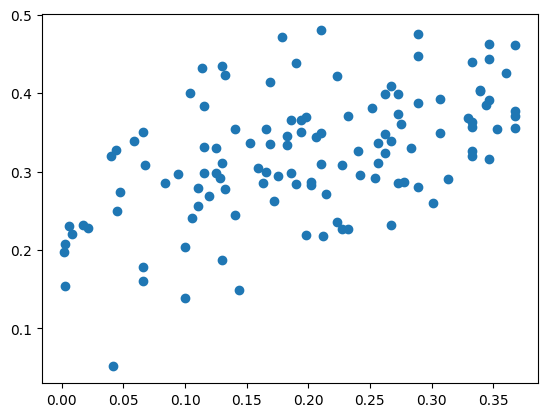

In [72]:
plt.scatter(dissimilarity_vec, preds)
plt.show()

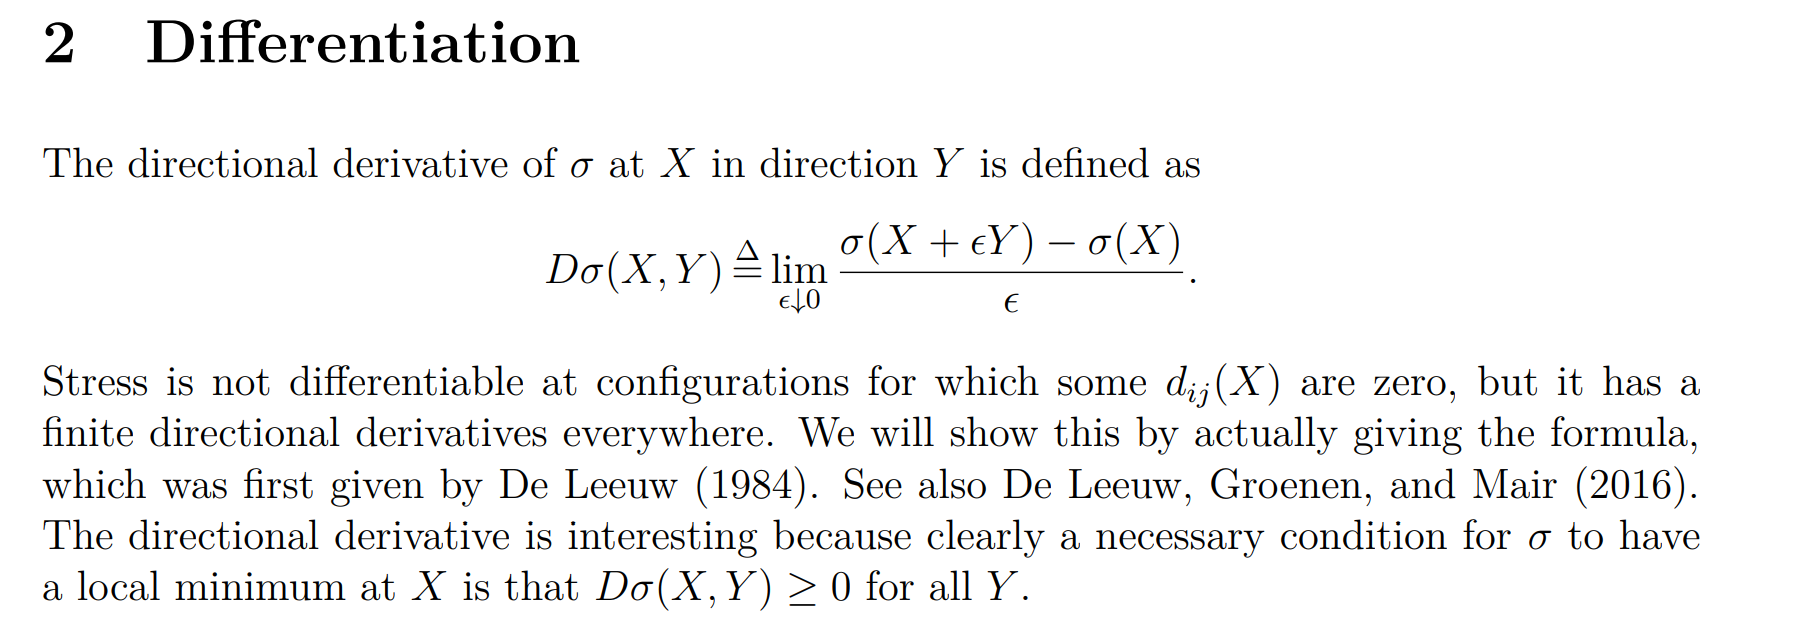
From https://jansweb.netlify.app/publication/deleeuw-e-18-c/

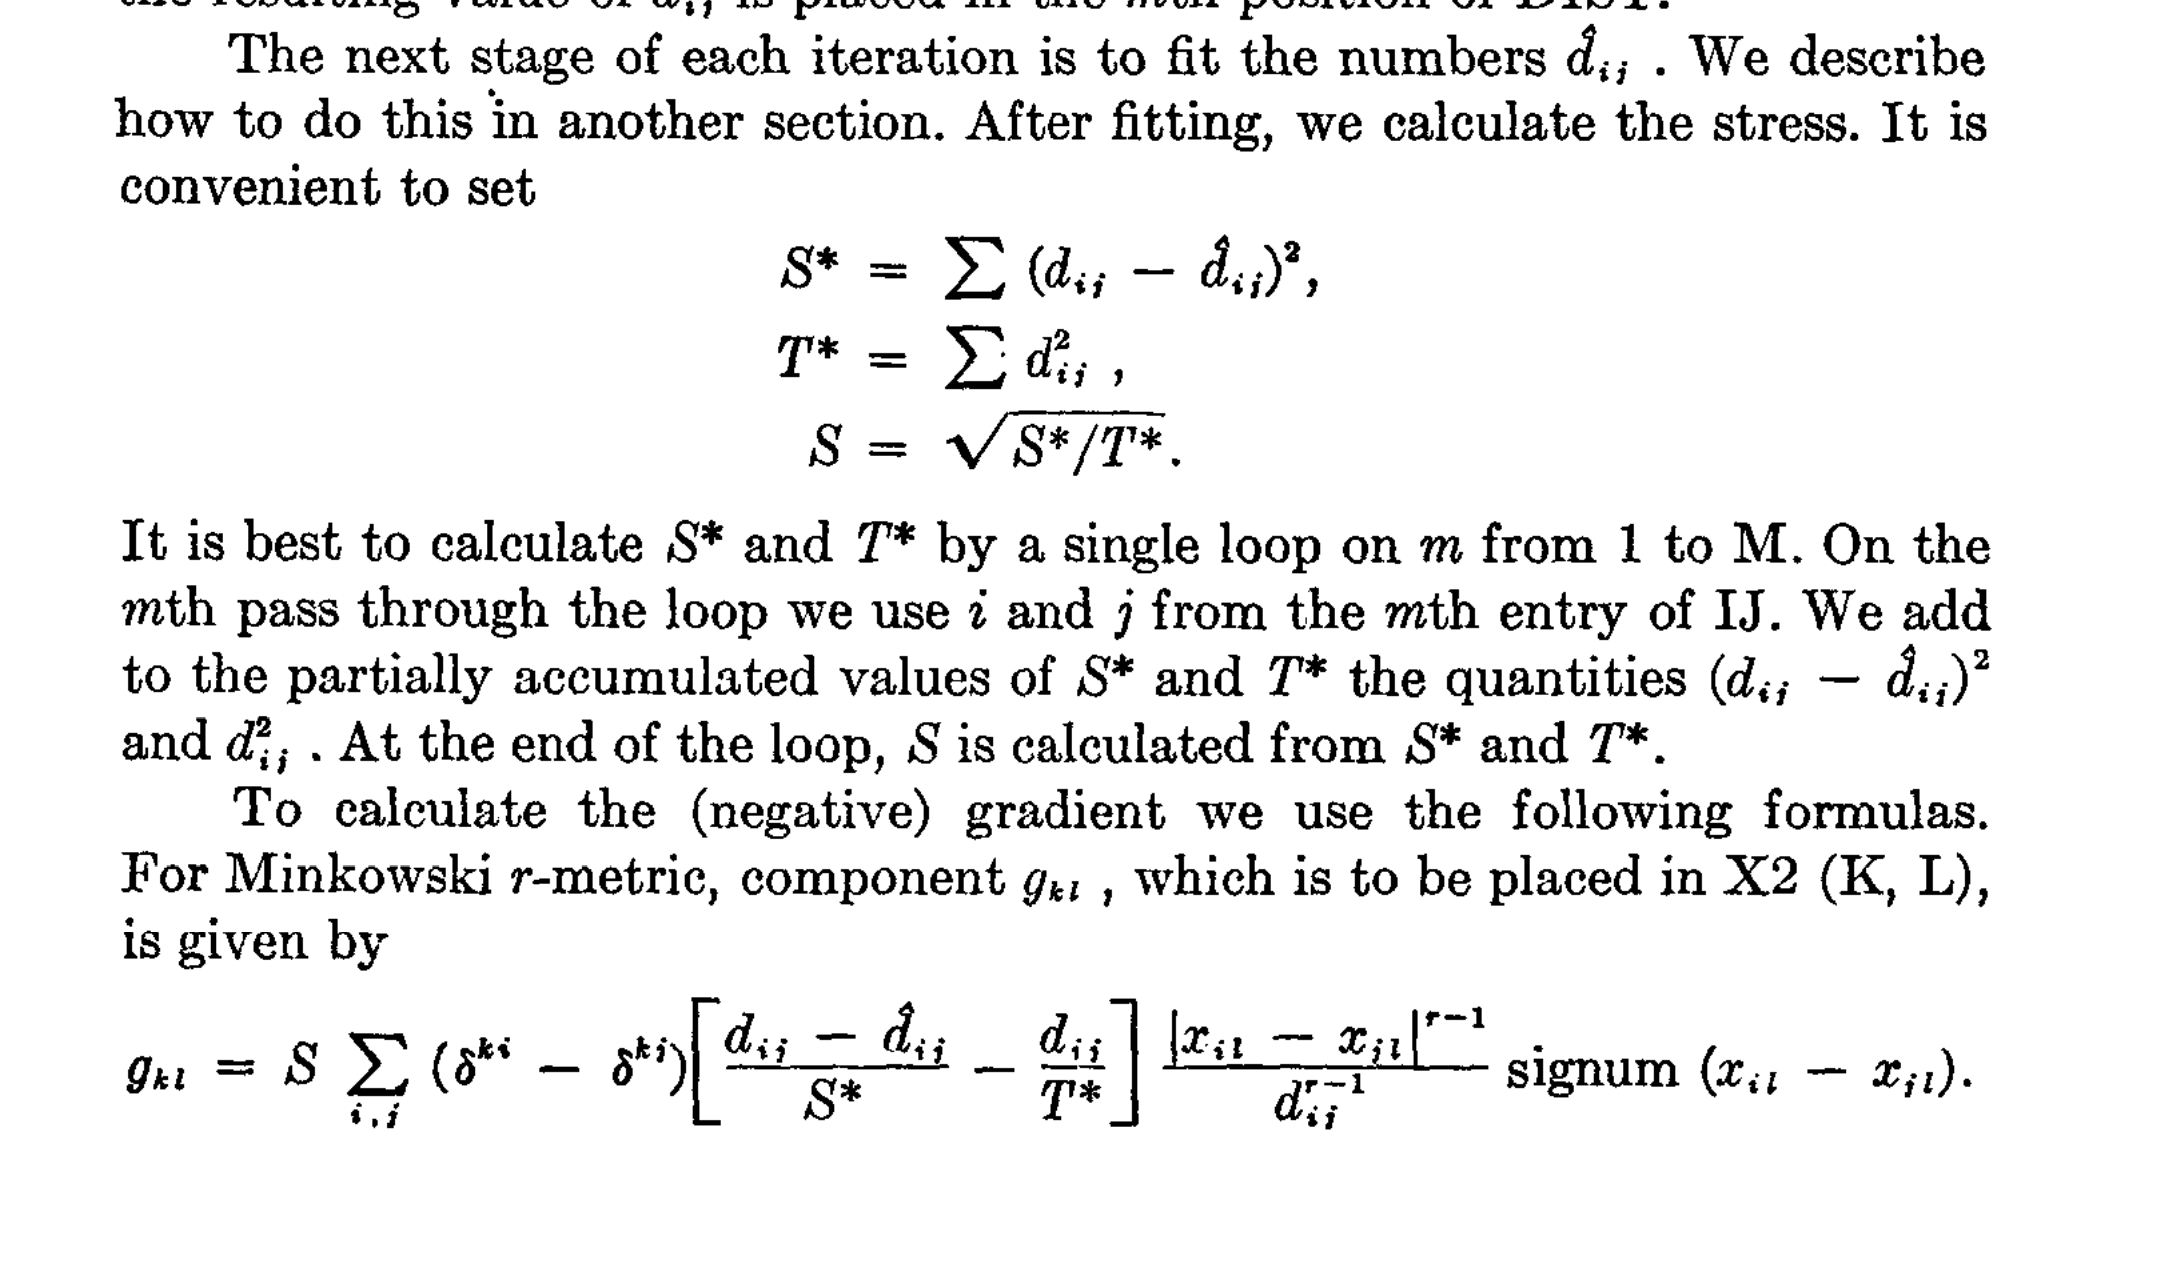
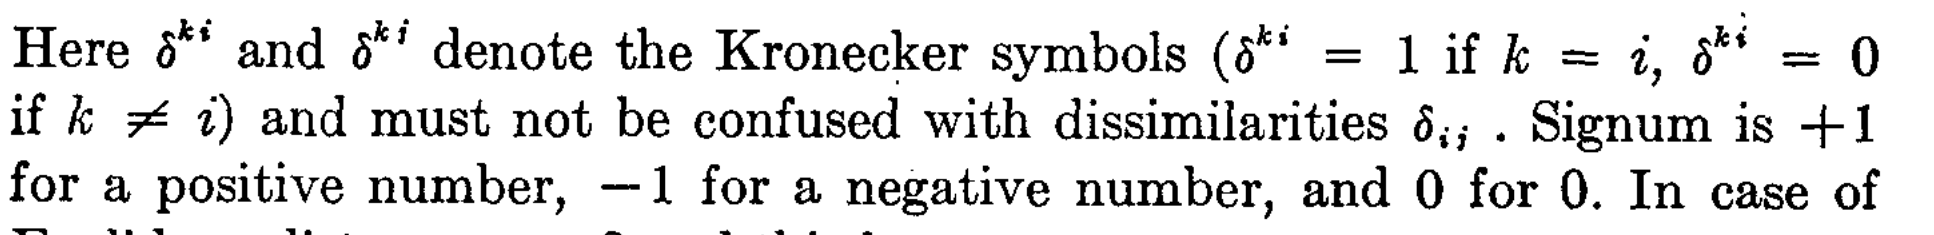
From Kruskal, 1964

In [73]:
model.trainable_variables

[<tf.Variable 'mds_model/dense/kernel:0' shape=(120, 128) dtype=float32, numpy=
 array([[-0.        , -0.        , -0.        , ..., -0.        ,
         -0.        , -0.        ],
        [-0.        , -0.        , -0.        , ..., -0.        ,
         -0.        , -0.        ],
        [-0.        ,  0.01371311, -0.        , ..., -0.        ,
         -0.        , -0.        ],
        ...,
        [-0.        , -0.        , -0.        , ..., -0.        ,
          0.00270509, -0.        ],
        [-0.        , -0.        , -0.        , ..., -0.        ,
         -0.        , -0.        ],
        [ 0.13787973, -0.        , -0.        , ..., -0.        ,
          0.14668751,  0.1429387 ]], dtype=float32)>,
 <tf.Variable 'mds_model/dense/bias:0' shape=(128,) dtype=float32, numpy=
 array([-0.1469519 , -0.11430863, -0.13875389, -0.13417536, -0.16705419,
        -0.14974119, -0.16088565, -0.12258441, -0.13306555, -0.14962411,
        -0.10967327, -0.13814123, -0.10569113, -0.1484808

In [74]:
len(dissimilarity_vec)


120

In [109]:
latest_config = model.trainable_variables[-1]

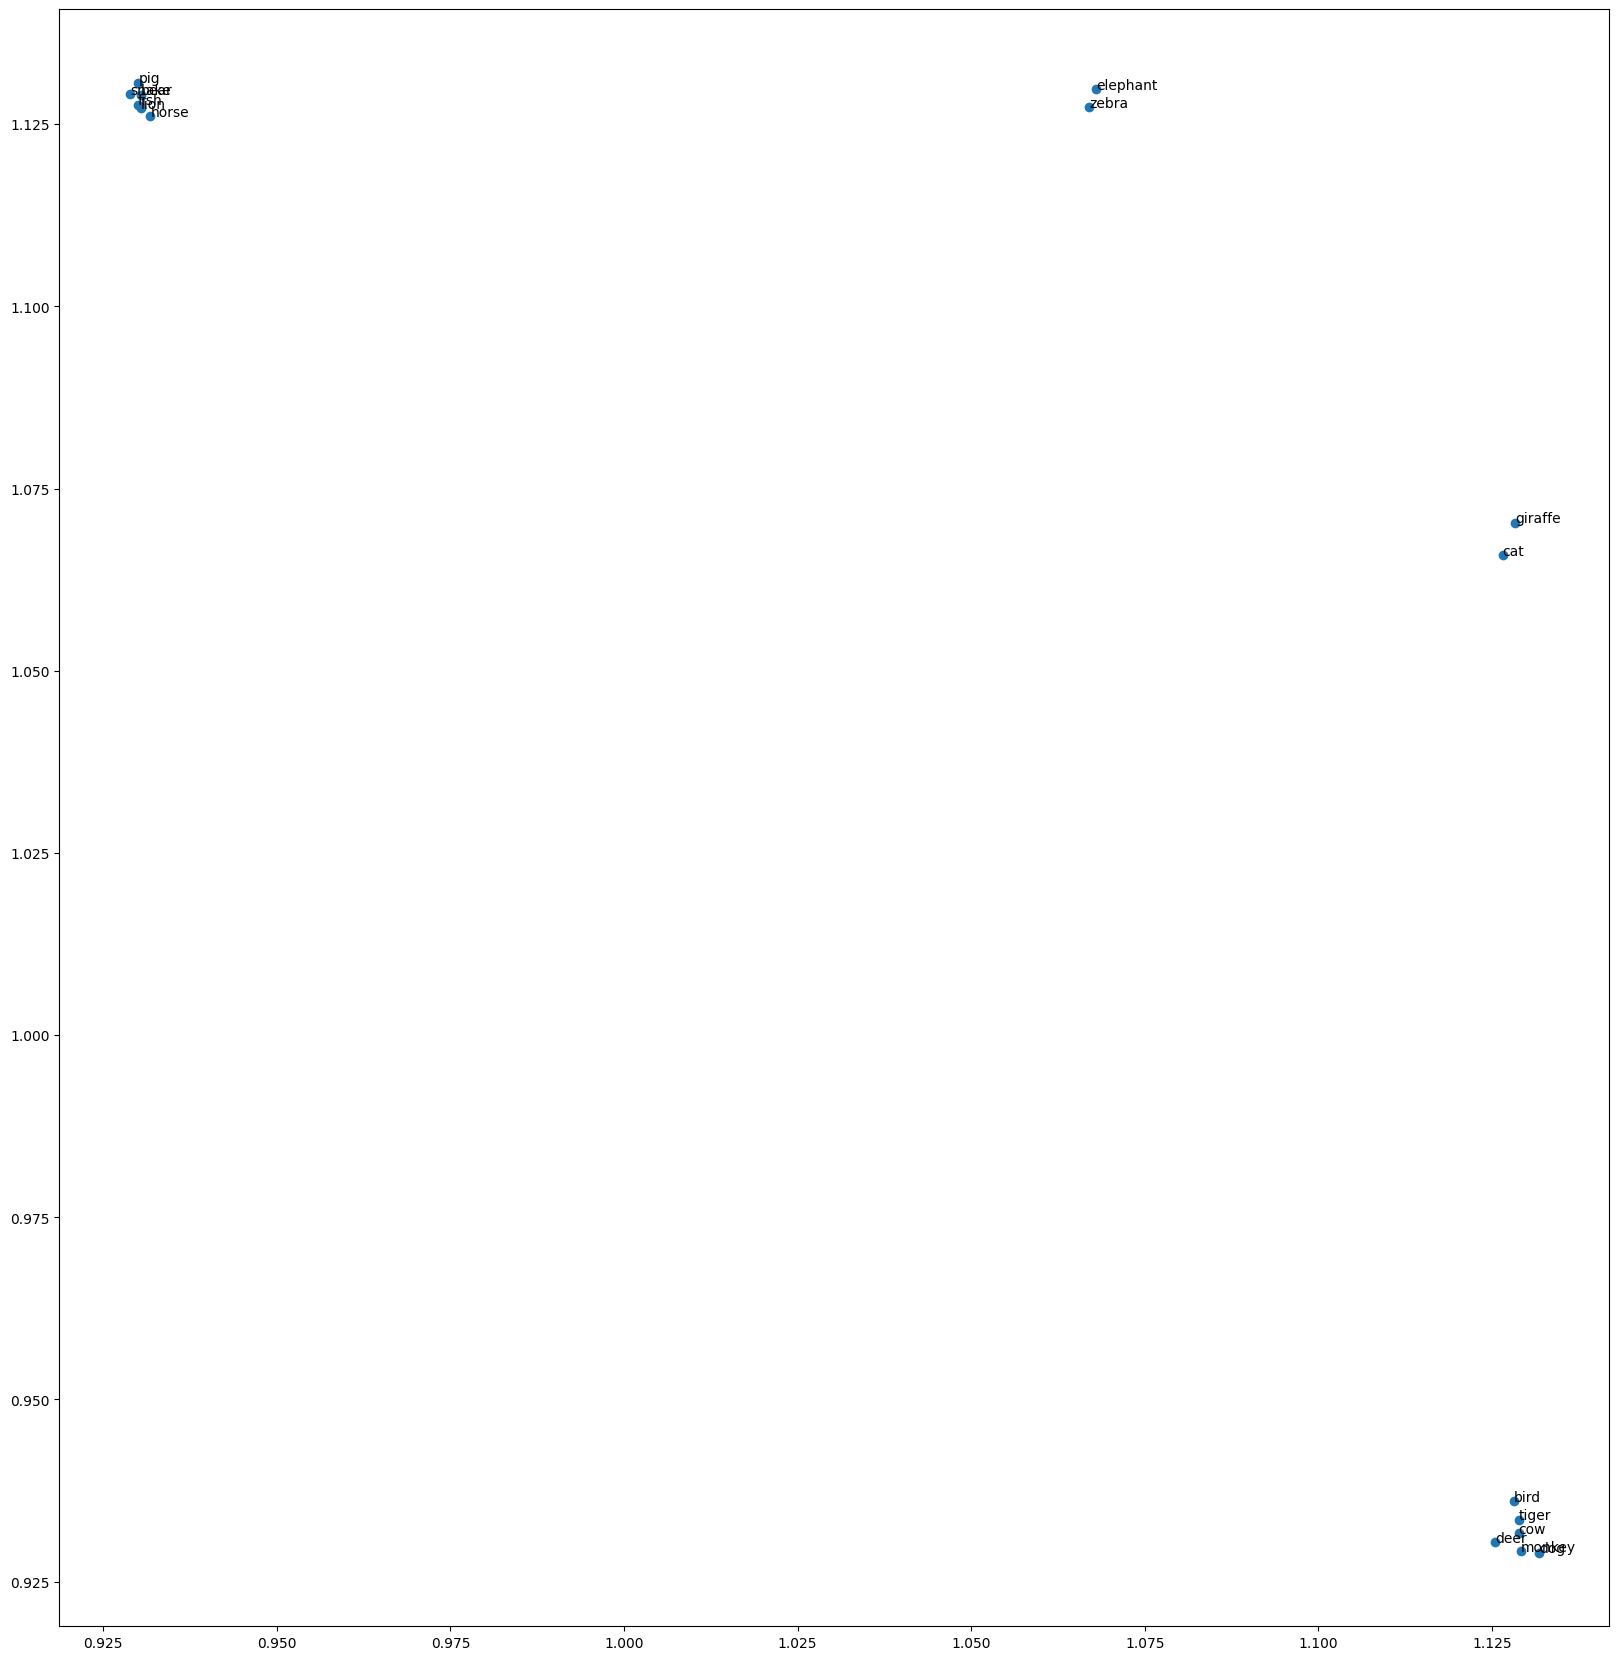

In [110]:
fig, ax = plt.subplots(figsize=(20,21))
ax.scatter(x=latest_config[:,0], y=latest_config[:,1])
for i, label in enumerate(big_matrix.index.to_list()):
       plt.annotate(label, (latest_config[i,0], latest_config[i,1]))

# ax.set_yscale('log')
# ax.set_xscale('log')
plt.show()